In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

# Ejercicios de Optimización en Redes Neuronales

## Ejercicio 1: Comparación de Optimizadores en Clasificación de Imágenes CIFAR-10

En este ejercicio, construirás una red neuronal convolucional (CNN) para clasificar imágenes del dataset CIFAR-10. Experimentarás con diferentes optimizadores para comparar su rendimiento:

1. Carga y preprocesa el dataset CIFAR-10:
   - Normaliza los valores de píxeles al rango [0,1]
   - Realiza data augmentation básico (rotación, flip horizontal)
   - Divide en conjuntos de entrenamiento y validación (80-20)

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


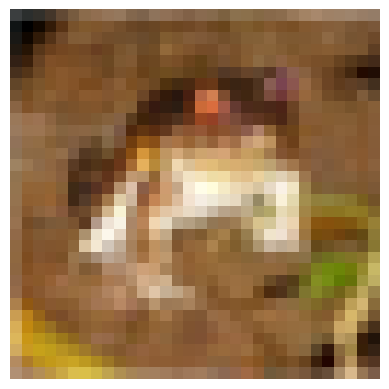

In [17]:
# Mostrar la imagen
plt.imshow(x_train[0])
plt.axis("off")  # Opcional: Oculta los ejes
plt.show()


In [ ]:
# ----------------------------- NORMALIZACION -----------------------------
x_train_normalizado = x_train / 255.0

print(f"Valor mínimo: {x_train_normalizado.min()}, Valor máximo: {x_train_normalizado.max()}")


Valor mínimo: 0.0, Valor máximo: 1.0


In [ ]:
# ----------------------------- AUGMENTACION -----------------------------
# Configurar las transformaciones
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotación aleatoria
    horizontal_flip=True  # Flip horizontal
)

# Aplicar a todas las imágenes y agregar al dataset
dataset_aumentado = np.array([datagen.random_transform(img) for img in x_train_normalizado])

# Mostrar los tamaños
print(f"Tamaño del dataset original: {x_train_normalizado.shape}")
print(f"Tamaño del dataset aumentado: {dataset_aumentado.shape}")

Tamaño del dataset original: (50000, 32, 32, 3)
Tamaño del dataset aumentado: (50000, 32, 32, 3)
Nuevo tamaño del dataset final: (50000, 32, 32, 3)


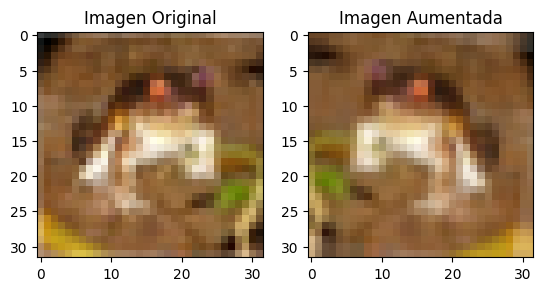

In [ ]:
# Mostrar una de las imagenes originales y una cambiada
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_train_normalizado[0])
ax[0].set_title("Imagen Original")

ax[1].imshow(dataset_aumentado[0])
ax[1].set_title("Imagen Aumentada")

plt.show()


In [30]:
# ----------------------------- DIVISION ENTR / TEST -----------------------------
# Divide en conjuntos de entrenamiento y validación (80-20)

# Suponiendo que tienes las etiquetas en 'labels'
X_train, X_val, y_train, y_val = train_test_split(dataset_aumentado, y_train, test_size=0.2, random_state=42)

# Mostrar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de validación: {X_val.shape}")



Tamaño del conjunto de entrenamiento: (40000, 32, 32, 3)
Tamaño del conjunto de validación: (10000, 32, 32, 3)


2. Implementa una CNN con la siguiente arquitectura:
   - 3 bloques convolucionales (Conv2D + BatchNormalization + ReLU + MaxPooling2D)
   - 2 capas densas finales
   - Dropout para regularización

In [32]:
# ----------------------------- CREACION CNN -----------------------------
# Definir la arquitectura de la CNN
model = Sequential([
    # Bloque 1
    Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3)),  # Ajusta input_shape si es diferente
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # Bloque 2
    Conv2D(64, (3, 3), padding="same"),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # Bloque 3
    Conv2D(128, (3, 3), padding="same"),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    # Aplanar y capas densas finales
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),  # Regularización
    Dense(10, activation="softmax")  # Cambia el número de neuronas según tu número de clases
])

# Compilar el modelo
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Usa "categorical_crossentropy" si las etiquetas están one-hot encoded
    metrics=["accuracy"]
)

# Resumen del modelo
model.summary()


c:\Users\albaro\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

3. Entrena el modelo con los siguientes optimizadores manteniendo los demás parámetros constantes:
   - SGD con momentum
   - Adam
   - RMSprop
   - AdaGrad


Entrenando con SGD + Momentum...

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 41ms/step - accuracy: 0.1770 - loss: 2.1845 - val_accuracy: 0.2496 - val_loss: 1.9464
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.2458 - loss: 1.9640 - val_accuracy: 0.2565 - val_loss: 2.0235
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.2989 - loss: 1.8373 - val_accuracy: 0.3452 - val_loss: 1.7505
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 39ms/step - accuracy: 0.3668 - loss: 1.6657 - val_accuracy: 0.5050 - val_loss: 1.3933
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.4481 - loss: 1.4844 - val_accuracy: 0.4954 - val_loss: 1.4042
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.5199 - loss: 1.3220 - val_accuracy: 0.5282 - val_loss: 1.2956
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.5686 - loss: 1.2023 - val_accuracy: 0.4835 - val_loss: 1.5255
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━

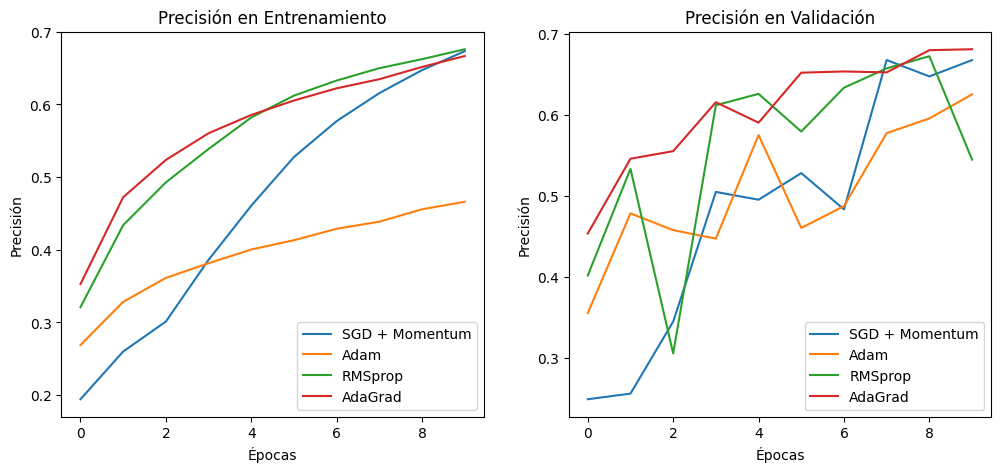

In [34]:
# ----------------------------- ENTRENAL MODELO -----------------------------

# Lista de optimizadores a probar
optimizers = {
    "SGD + Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "Adam": Adam(learning_rate=0.001),
    "RMSprop": RMSprop(learning_rate=0.001),
    "AdaGrad": Adagrad(learning_rate=0.01)
}

# Guardar los historiales de entrenamiento
history_dict = {}

# Definir una función para crear y entrenar el modelo con diferentes optimizadores
def build_and_train(optimizer_name, optimizer):
    print(f"\nEntrenando con {optimizer_name}...\n")
    
    # Crear el modelo
    model = tf.keras.Sequential([
        # Bloque 1
        tf.keras.layers.Conv2D(32, (3,3), padding="same", input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        # Bloque 2
        tf.keras.layers.Conv2D(64, (3,3), padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        # Bloque 3
        tf.keras.layers.Conv2D(128, (3,3), padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        # Capas densas
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax")  # Ajusta según número de clases
    ])

    # Compilar modelo con el optimizador seleccionado
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    # Entrenar el modelo
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

    # Guardar historial
    history_dict[optimizer_name] = history

# Entrenar el modelo con cada optimizador
for name, opt in optimizers.items():
    build_and_train(name, opt)

# Graficar resultados
plt.figure(figsize=(12, 5))

# Precisión de entrenamiento
plt.subplot(1, 2, 1)
for name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f"{name}")
plt.title("Precisión en Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

# Precisión en validación
plt.subplot(1, 2, 2)
for name, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f"{name}")
plt.title("Precisión en Validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

plt.show()


4. Compara y visualiza:
   - Curvas de pérdida de entrenamiento y validación
   - Precisión final en el conjunto de validación
   - Tiempo de entrenamiento
   - Tasa de convergencia

In [35]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Guardar los tiempos de entrenamiento
training_times = {}

# Función para crear, entrenar y evaluar el modelo con diferentes optimizadores
def build_and_train_evaluate(optimizer_name, optimizer):
    print(f"\nEntrenando con {optimizer_name}...\n")
    
    # Crear el modelo
    model = tf.keras.Sequential([
        # 🔹 Bloque 1
        tf.keras.layers.Conv2D(32, (3,3), padding="same", input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        # 🔹 Bloque 2
        tf.keras.layers.Conv2D(64, (3,3), padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        # 🔹 Bloque 3
        tf.keras.layers.Conv2D(128, (3,3), padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        # 🔹 Capas densas
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax")  # Ajusta según número de clases
    ])

    # Compilar el modelo
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    # Medir el tiempo de entrenamiento
    start_time = time.time()

    # Entrenar el modelo
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

    end_time = time.time()
    training_times[optimizer_name] = end_time - start_time

    # Evaluar en el conjunto de validación
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    
    return history, val_accuracy, val_loss

# Inicializar diccionario para almacenar resultados
history_dict = {}
val_accuracy_dict = {}
val_loss_dict = {}

# Entrenar y evaluar el modelo con cada optimizador
for name, opt in optimizers.items():
    history, val_accuracy, val_loss = build_and_train_evaluate(name, opt)
    history_dict[name] = history
    val_accuracy_dict[name] = val_accuracy
    val_loss_dict[name] = val_loss

# Visualizar las curvas de pérdida de entrenamiento y validación
plt.figure(figsize=(12, 5))

# Pérdida de entrenamiento
plt.subplot(1, 2, 1)
for name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f"Entrenamiento - {name}")
    plt.plot(history.history['val_loss'], label=f"Validación - {name}", linestyle="--")
plt.title("Curvas de Pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

# Precisión de entrenamiento
plt.subplot(1, 2, 2)
for name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f"Entrenamiento - {name}")
    plt.plot(history.history['val_accuracy'], label=f"Validación - {name}", linestyle="--")
plt.title("Curvas de Precisión")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

plt.show()

# Visualizar la precisión final en el conjunto de validación
print("\nPrecisión final en el conjunto de validación:")
for name, accuracy in val_accuracy_dict.items():
    print(f"{name}: {accuracy * 100:.2f}%")

# Mostrar el tiempo de entrenamiento de cada optimizador
print("\nTiempo de entrenamiento:")
for name, time_taken in training_times.items():
    print(f"{name}: {time_taken:.2f} segundos")

# Tasa de convergencia (precisión al final de las primeras épocas)
print("\nTasa de Convergencia (Precisión después de 5 épocas):")
for name, history in history_dict.items():
    # Obtener la precisión en la 5ta época (siempre que hayan al menos 5 épocas)
    if len(history.history['accuracy']) >= 5:
        print(f"{name}: {history.history['accuracy'][4] * 100:.2f}%")
    else:
        print(f"{name}: No suficiente tiempo de entrenamiento")



Entrenando con SGD + Momentum...

Epoch 1/10


NotImplementedError: numpy() is only available when eager execution is enabled.

https://www.cs.toronto.edu/~kriz/cifar.html

## Ejercicio 2: Análisis de Funciones de Activación y Loss en Predicción de Series Temporales

Utilizarás el dataset público de calidad del aire de Beijing para crear un modelo de predicción de niveles de contaminación. Analizarás el impacto de diferentes funciones de activación y pérdida:

1. Preprocesamiento de datos:
   - Carga el dataset de calidad del aire de Beijing
   - Maneja valores faltantes
   - Normaliza las características
   - Crea secuencias temporales con ventana deslizante

2. Implementa una red LSTM con:
   - 2 capas LSTM
   - Capas densas intermedias
   - Capa de salida para predicción

3. Experimenta con las siguientes combinaciones:
   Funciones de activación en capas intermedias:
   - ReLU
   - LeakyReLU
   - SELU
   - Tanh
   
   Funciones de pérdida:
   - MSE
   - MAE
   - Huber Loss
   - Log-cosh

4. Analiza y visualiza:
   - Error de predicción (RMSE y MAE)
   - Estabilidad del entrenamiento
   - Capacidad de generalización
   - Comportamiento con outliers


https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data